Pour essayer les exemples présents dans ce tutoriel : 


<a href="https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02a_pandas_tutorial.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02a_pandas_tutorial.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)]("https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/course/manipulation/02a_pandas_tutorial.ipynb")
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)]("https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2F
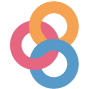

In [1]:
#| echo: false
#| output: 'asis'
#| include: true
#| eval: true

import sys
sys.path.insert(1, '../../../../') #insert the utils module
from utils import print_badges

#print_badges(__file__)
print_badges("content/course/manipulation/02a_pandas_tutorial.qmd")

Dans ce tutoriel `pandas`, nous allons utiliser:

* Les émissions de gaz à effet de serre estimées au niveau communal par l'ADEME. Le jeu de données est 
disponible sur [data.gouv](https://www.data.gouv.fr/fr/datasets/inventaire-de-gaz-a-effet-de-serre-territorialise/#_)
et requêtable directement dans `Python` avec
[cet url](https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert)

Le [chapitre suivant](#pandasTP) permettra de mettre en application des éléments présents dans ce chapitre avec
les données ci-dessus associées à des données de contexte au niveau communal[^1].


[^1]: Idéalement, on utiliserait les données
[disponibles sur le site de l'Insee](https://www.insee.fr/fr/statistiques/3560121) mais celles-ci nécessitent un peu de travail
de nettoyage qui n'entre pas dans le cadre de ce TP. 
Pour faciliter l'import de données Insee, il est recommandé d'utiliser le package
[`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data) qui simplifie l'accès aux données
de l'Insee disponibles sur le site web [insee.fr](https://www.insee.fr/fr/accueil)
ou via des API. 

{{% box status="note" title="Note" icon="fa fa-comment" %}}
Le package `pynsee` est relativement jeune et n'est disponible que sur
[Github](https://github.com/InseeFrLab/Py-Insee-Data), pas sur `PyPi`.
Idéalement, on utilise la commande suivante, en ligne de commande, pour l'installer:

~~~shell
pip install git+https://github.com/InseeFrLab/Py-Insee-Data.git
~~~

Cependant, cela implique que `Jupyter` et `Git` sont capables de communiquer. Si
`Jupyter` ne sait pas où trouver `Git`, il est possible de rencontrer une erreur.

Dans ce cas, il faut télécharger le package compressé et l'installer localement : 


In [2]:
#| eval: false
import requests

url = 'https://github.com/InseeFrLab/Py-Insee-Data/archive/refs/heads/master.zip'
r = requests.get(url)
with open("pynsee.zip" , 'wb') as zipfile:
    zipfile.write(r.content)

!pip install --ignore-installed pynsee.zip
!pip install python-Levenshtein

Si le fait de ne pas avoir de barre de progrès lors du téléchargement
vous trouble, vous pouvez vous rendre à la
[Section Annexe](#annexe) pour découvrir un bout de code
qui effectue les mêmes tâches mais avec des barres de progrès

{{% /box %}}

:warning: `pandas` offre la possibilité d'importer des données
directement depuis un url. C'est l'option prise dans ce tutoriel.
Si vous préfèrez, pour des
raisons d'accès au réseau ou de performance, importer depuis un poste local,
vous pouvez télécharger les données et changer
les commandes d'import avec le chemin adéquat plutôt que l'url. 


Nous suivrons les conventions habituelles dans l'import des packages


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pynsee.download

Pour obtenir des résultats reproductibles, on peut fixer la racine du générateur
pseudo-aléatoire. 


In [4]:
np.random.seed(123)

Au cours de cette démonstration des principales fonctionalités de `pandas`, et
lors du TP


<a href="https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)]("https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb")
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)]("https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2
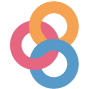

In [5]:
#| echo: false
#| output: 'asis'
#| include: true
#| eval: true

import sys
sys.path.insert(1, '../../../../') #insert the utils module
from utils import print_badges

#print_badges(__file__)
print_badges("content/course/manipulation/02b_pandas_TP.qmd")

Je recommande de se référer régulièrement aux ressources suivantes:

* L'[aide officielle de pandas](https://pandas.pydata.org/docs/user_guide/index.html).
Notamment, la
[page de comparaison des langages](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/index.html)
est très utile
* La cheatsheet suivante, [issue de ce post](https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463)

![Cheasheet pandas](https://cdn-images-1.medium.com/max/2000/1*YhTbz8b8Svi22wNVvqzneg.jpeg)

# Logique de pandas

L'objet central dans la logique `pandas` est le `DataFrame`.
Il s'agit d'une structure particulière de données
à deux dimensions, structurées en alignant des lignes et colonnes. Les colonnes
peuvent être de type différent.

Un DataFrame est composé des éléments suivants:

* l'indice de la ligne ;
* le nom de la colonne ;
* la valeur de la donnée ;

Structuration d'un DataFrame pandas, emprunté à <https://medium.com/epfl-extension-school/selecting-data-from-a-pandas-dataframe-53917dc39953>:

![](https://miro.medium.com/max/700/1*6p6nF4_5XpHgcrYRrLYVAw.png)

Le concept de *tidy* data, popularisé par Hadley Wickham via ses packages `R`,
est parfaitement pertinent pour décrire la structure d'un DataFrame pandas.
Les trois règles sont les suivantes:

* Chaque variable possède sa propre colonne
* Chaque observation possède sa propre ligne
* Une valeur, matérialisant la valeur d'une observation d'une variable,
se trouve sur une unique cellule.


![Concept de tidy data (emprunté à H. Wickham)](https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png)

:warning: Les DataFrames sont assez rapides en Python[^1] et permettent de traiter en local de manière efficace des tables de
données comportant plusieurs millions d'observations (en fonction de la configuration de l'ordinateur)
et dont la volumétrie peut être conséquente (plusieurs centaines
de Mo). Néanmoins,  passé un certain seuil, qui dépend de la puissance de la machine mais aussi de la complexité
de l'opération effectuée, le DataFrame `pandas` peut montrer certaines limites. Dans ce cas, il existe différentes
solutions: `dask` (dataframe aux opérations parallélisés), `SQL` (notamment postgres), `spark` (solution big data)

[^1]:  En `R`, les deux formes de dataframes qui se sont imposées récemment sont les `tibbles` (package `dplyr`)
et les `data.tables` (package `data.table`). `dplyr` reprend la syntaxe SQL de manière relativement
transparente ce qui rend la syntaxe très proche de celle de `pandas`. Cependant,
alors que `dplyr` supporte très mal les données dont la volumétrie dépasse 1Go, `pandas` s'en
accomode bien. Les performances de `pandas` sont plus proches de celles de `data.table`, qui est
connu pour être une approche efficace avec des données de taille importante.

Concernant la syntaxe, une partie des commandes python est inspirée par la logique SQL. On retrouvera ainsi
des instructions relativement transparentes.

Il est vivement recommandé, avant de se lancer dans l'écriture d'une
fonction, de se poser la question de son implémentation native dans `numpy`, `pandas`, etc.
En particulier, la plupart du temps, s'il existe une solution implémentée dans une librairie, il convient
de l'utiliser.

# Les Series

En fait, un DataFrame est une collection d'objets appelés `pandas.Series`.
Ces `Series` sont des objets d'une dimension qui sont des extensions des
array-unidimensionnels `numpy`. En particulier, pour faciliter le traitement
de données catégorielles ou temporelles, des types de variables
supplémentaires sont disponibles dans `pandas` par rapport à
`numpy` (`categorical`, `datetime64` et `timedelta64`). Ces
types sont associés à des méthodes optimisées pour faciliter le traitement
de ces données.

Il ne faut pas négliger l'attribut `dtype` d'un objet
`pandas.Series` car cela a une influence déterminante sur les méthodes
et fonctions pouvant être utilisées (on ne fait pas les mêmes opérations
sur une donnée temporelle et une donnée catégorielle) et le volume en
mémoire d'une variable (le type de la variable détermine le volume
d'information stocké pour chaque élément ; être trop précis est parfois
néfaste).

Il existe plusieurs types possibles pour un `pandas.Series`.
Le type `object` correspond aux types Python `str` ou `mixed`.
Il existe un type particulier pour les variables dont le nombre de valeurs
est une liste finie et relativement courte, le type `category`.
Il faut bien examiner les types de son DataFrame, et convertir éventuellement
les types lors de l'étape de `data cleaning`.

### Indexation

La différence essentielle entre une `Series` et un objet `numpy` est l'indexation.
Dans `numpy`,
l'indexation est implicite ; elle permet d'accéder à une donnée (celle à
l'index situé à la position *i*).
Avec une `Series`, on peut bien-sûr utiliser un indice de position mais on peut
surtout faire appel à des indices plus explicites.
Par exemple,


In [6]:
taille = pd.Series(
    [1.,1.5,1],
    index = ['chat', 'chien', 'koala']
)

taille.head()

chat     1.0
chien    1.5
koala    1.0
dtype: float64

Cette indexation permet d'accéder à des valeurs de la `Series`
via une valeur de l'indice. Par
exemple, `taille['koala']`:


In [7]:
taille['koala']

1.0

L'existence d'indice rend le *subsetting* particulièrement aisé, ce que vous
pouvez expérimenter dans les TP


<a href="https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)]("https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb")
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)]("https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2
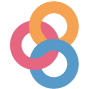

In [8]:
#| echo: false
#| output: 'asis'
#| include: true
#| eval: true

import sys
sys.path.insert(1, '../../../../') #insert the utils module
from utils import print_badges

#print_badges(__file__)
print_badges("content/course/manipulation/02b_pandas_TP.qmd")

Pour transformer un objet `pandas.Series` en array `numpy`,
on utilise la méthode `values`. Par exemple, `taille.values`:


In [9]:
taille.values

array([1. , 1.5, 1. ])

Un avantage des `Series` par rapport à un *array* `numpy` est que
les opérations sur les `Series` alignent
automatiquement les données à partir des labels.
Avec des `Series` labélisées, il n'est ainsi pas nécessaire
de se poser la question de l'ordre des lignes.
L'exemple dans la partie suivante permettra de s'en assurer.


### Valeurs manquantes

Par défaut, les valeurs manquantes sont affichées `NaN` et sont de type `np.nan` (pour
les valeurs temporelles, i.e. de type `datatime64`, les valeurs manquantes sont
`NaT`).

On a un comportement cohérent d'agrégation lorsqu'on combine deux `DataFrames` (ou deux colonnes).
Par exemple,


In [10]:
x = pd.DataFrame(
    {'prix': np.random.uniform(size = 5),
     'quantite': [i+1 for i in range(5)]
    },
    index = ['yaourt','pates','riz','tomates','gateaux']
)
x

,prix,quantite
yaourt,0.696469,1
pates,0.286139,2
riz,0.226851,3
tomates,0.551315,4
gateaux,0.719469,5


In [11]:
y = pd.DataFrame(
    {'prix': [np.nan, 0, 1, 2, 3],
     'quantite': [i+1 for i in range(5)]
    },
    index = ['tomates','yaourt','gateaux','pates','riz']
)
y

,prix,quantite
tomates,NaN,1
yaourt,0.0,2
gateaux,1.0,3
pates,2.0,4
riz,3.0,5


In [12]:
x + y

,prix,quantite
gateaux,1.719469,8
pates,2.286139,6
riz,3.226851,8
tomates,NaN,5
yaourt,0.696469,3


donne bien une valeur manquante pour la ligne `tomates`. Au passage, on peut remarquer que l'agrégation
a tenu compte des index.

Il est possible de supprimer les valeurs manquantes grâce à `dropna()`.
Cette méthode va supprimer toutes les lignes où il y a au moins une valeur manquante.
Il est aussi possible de supprimer seulement les colonnes où il y a des valeurs manquantes
dans un DataFrame avec `dropna()` avec le paramètre `axis=1` (par défaut égal à 0).

Il est également possible de remplir les valeurs manquantes grâce à la méthode `fillna()`.

# Le DataFrame pandas

Le `DataFrame` est l'objet central de la librairie `pandas`.
Il s'agit d'une collection de `pandas.Series` (colonnes) alignées par les index.
Les types des variables peuvent différer.

Un DataFrame non-indexé a la structure suivante:

<!-----
Exo 1
Aller dans la doc pandas et trouver comment créer le dataFrame pandas suivant
------>


In [13]:
df = pd.DataFrame(
    {'taille': [1.,1.5,1],
    'poids' : [3, 5, 2.5]
    },
    index = ['chat', 'chien', 'koala']
)
df.reset_index()

,index,taille,poids
0,chat,1.0,3.0
1,chien,1.5,5.0
2,koala,1.0,2.5


Alors que le même dataframe indexé aura la structure suivante:


In [14]:
df = pd.DataFrame(
    {'taille': [1.,1.5,1],
    'poids' : [3, 5, 2.5]
    },
    index = ['chat', 'chien', 'koala']
)
df.head()

,taille,poids
chat,1.0,3.0
chien,1.5,5.0
koala,1.0,2.5


## Les attributs et méthodes utiles

Pour présenter les méthodes les plus pratiques pour l'analyse de données,
on peut partir de l'exemple des consommations de CO2 communales issues
des données de l'Ademe. Cette base de données est exploitée plus intensément
dans le TP


<a href="https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)]("https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb")
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)]("https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2
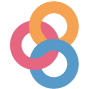

In [15]:
#| echo: false
#| output: 'asis'
#| include: true
#| eval: true

import sys
sys.path.insert(1, '../../../../') #insert the utils module
from utils import print_badges

#print_badges(__file__)
print_badges("content/course/manipulation/02b_pandas_TP.qmd")

In [16]:
df = pd.read_csv("https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert")
df

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172
1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577909,NaN,10313.446520,5314.314445,998.332482,2930.354461,16616.822530,15642.420310,10732.376930
3,01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,663.683146,1756.341319,782.404357
4,01006,AMBLEON,448.966808,NaN,NaN,77.033834,48.401549,NaN,NaN,43.714019,398.786800,51.681756
...,...,...,...,...,...,...,...,...,...,...,...,...
35793,95676,VILLERS-EN-ARTHIES,1628.065094,NaN,NaN,165.045396,65.063617,11.772789,34.556067,176.098160,309.627908,235.439109
35794,95678,VILLIERS-ADAM,698.630772,NaN,NaN,1331.126598,111.480954,2.354558,6.911213,1395.529811,18759.370070,403.404815
35795,95680,VILLIERS-LE-BEL,107.564967,NaN,NaN,8367.174532,225.622903,534.484607,1568.845431,22613.830250,12217.122400,13849.512000
35796,95682,VILLIERS-LE-SEC,1090.890170,NaN,NaN,326.748418,108.969749,2.354558,6.911213,67.235487,4663.232127,85.657725


Dans un processus de production, où normalement on connait les types des variables du DataFrame qu'on va importer,
il convient de préciser les types avec lesquels on souhaite importer les données
(argument `dtype`, sous la forme d'un dictionnaire). Cela est particulièrement important lorsqu'on désire utiliser une colonne comme une variable textuelle mais qu'elle comporte des attributs proches d'un nombre qui vont inciter `pandas` à l'importer sous forme de variable numérique.

Par exemple, une colonne `[00001,00002,...] ` risque d'être importée comme une variable numérique, ignorant l'information des premiers 0 (qui peuvent pourtant la distinguer de la séquence 1, 2, etc.). Pour s'assurer que `pandas` importe sous forme textuelle la variable, on peut utiliser `dtype = {"code": "str"}`
Sinon, on peut importer le csv, et modifier les types avec `astype()`.
Avec `astype`, on peut gérer les erreurs de conversion avec le paramètre `errors`.

L'affichage des DataFrames est très ergonomique. On obtiendrait le même *output*
avec `display(df)`[^2]. Les premières et dernières lignes s'affichent
automatiquement. Autrement, on peut aussi faire:

* `head` qui permet, comme son
nom l'indique, de n'afficher que les premières lignes ;
* `tail` qui permet, comme son
nom l'indique, de n'afficher que les dernières lignes
* `sample` qui permet d'afficher un échantillon aléatoire de *n* lignes.
Cette méthode propose de nombreuses options


<a href="https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)]("https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb")
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)]("https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2
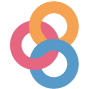

In [17]:
#| echo: false
#| output: 'asis'
#| include: true
#| eval: true

import sys
sys.path.insert(1, '../../../../') #insert the utils module
from utils import print_badges

#print_badges(__file__)
print_badges("content/course/manipulation/02b_pandas_TP.qmd")

[^2]: Il est préférable d'utiliser la fonction `display` (ou tout simplement
taper le nom du DataFrame qu'utiliser la fonction `print`). Le
`display` des objets `pandas` est assez esthétique, contrairement à `print`
qui renvoie du texte brut.


{{% box status="danger" title="warning" icon="fa fa-exclamation-triangle" %}}
Il faut faire attention au `display` et aux
commandes qui révèlent des données (`head`, `tail`, etc.)
dans un notebook ou un markdown qui exploite
des données confidentielles lorsqu'on utilise `git`. En effet, on peut se
retrouver à partager des données, involontairement, dans l'historique
`git`. Avec un `R markdown`, il suffit d'ajouter les sorties au fichier
`gitignore` (par exemple avec une balise de type `*.html`). Avec un
notebook `jupyter`, la démarche est plus compliquée car les fichiers
`.ipynb` intègrent dans le même document, texte, sorties et mise en forme.
Techniquement, il est possible d'appliquer des filtres avec `git`
(voir
[ici](http://timstaley.co.uk/posts/making-git-and-jupyter-notebooks-play-nice/))
mais c'est une démarche très complexe
{{% /box %}}

On pourra alors préférer convertir systématiquement les `.ipynb` en `.py` grâce
à `jupytext` (`jupytext --to py nom_du_notebook.ipynb`) et mettre l'extension `*.ipynb`
dans le `.gitignore` de son projet git.

### Dimensions et structure du DataFrame

Les premières méthodes utiles permettent d'afficher quelques
attributs d'un DataFrame.


In [18]:
df.axes
df.columns
df.index

RangeIndex(start=0, stop=35798, step=1)

Pour connaître les dimensions d'un DataFrame, on peut utiliser quelques méthodes
pratiques:


In [19]:
df.ndim
df.shape
df.size

429576

Pour déterminer le nombre de valeurs uniques d'une variable, plutôt que chercher à écrire soi-même une fonction,
on utilise la
méthode `nunique`. Par exemple,


In [20]:
df['Commune'].nunique()

33338

Voici un premier résumé des méthodes `pandas` utiles, et un comparatif avec `R`

| Opération                     | pandas       | dplyr (`R`)    | data.table (`R`)           |
|-------------------------------|--------------|----------------|----------------------------|
| Récupérer le nom des colonnes | `df.columns` | `colnames(df)` | `colnames(df)`             |
| Récupérer les indices[^3]     | `df.index`   |                |`unique(df[,get(key(df))])` |
| Récupérer les dimensions      | `df.shape` | `c(nrow(df), ncol(df))` | `c(nrow(df), ncol(df))` |
| Récupérer le nombre de valeurs uniques d'une variable | `df['myvar'].nunique()` | `df %>%  summarise(distinct(myvar))` | `df[,uniqueN(myvar)]` |

[^3]: Le principe d'indice n'existe pas dans `dplyr`. Ce qui s'approche le plus des indices, au sens de
`pandas`, sont les *clés* en `data.table`.


### Statistiques agrégées

`pandas` propose une série de méthodes pour faire des statistiques
agrégées de manière efficace.

On peut, par exemple, appliquer des méthodes pour compter le nombre de lignes,
faire une moyenne ou une somme de l'ensemble des lignes


In [21]:
df.count()
df.mean()
df.sum()
df.nunique()
df.quantile(q = [0.1,0.25,0.5,0.75,0.9])

/tmp/ipykernel_784/2579739441.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
0.10,382.620882,25.034578,4.430792,109.152816,14.811230,2.354558,6.911213,50.180933,199.765410,49.289082
0.25,797.682631,52.560412,10.050967,197.951108,25.655166,2.354558,6.911213,96.052911,419.700460,94.749885
0.50,1559.381286,106.795928,19.924343,424.849988,54.748654,4.709115,13.822427,227.091193,1070.895593,216.297718
0.75,3007.883903,237.341501,32.983111,1094.749826,110.820941,51.800270,152.046694,749.469293,3098.612157,576.155869
0.90,5442.727470,528.349529,59.999169,3143.759029,190.695774,367.311008,1154.172630,2937.699672,8151.047248,1897.732565


Il faut toujours regarder les options de ces fonctions en termes de valeurs manquantes, car
ces options sont déterminantes dans le résultat obtenu.

Les exercices de TD visent à démontrer l'intérêt de ces méthodes dans quelques cas précis.


<a href="https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)]("https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb")
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)]("https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2
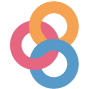

In [22]:
#| echo: false
#| output: 'asis'
#| include: true
#| eval: true

import sys
sys.path.insert(1, '../../../../') #insert the utils module
from utils import print_badges

#print_badges(__file__)
print_badges("content/course/manipulation/02b_pandas_TP.qmd")

<!---
Comme indiqué précédemment, il faut faire attention aux valeurs manquantes qui,
par défaut, sont traitées comme des 0.
Il est ainsi recommandé de systématiquement
ajouter l'argument skipna, par exemple,


In [23]:
df.mean(skipna=True)

/tmp/ipykernel_784/850589618.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Agriculture                        2459.975760
Autres transports                   654.919940
Autres transports international    7692.344960
CO2 biomasse hors-total            1774.381550
Déchets                             410.806329
Energie                             662.569846
Industrie hors-énergie             2423.127789
Résidentiel                        1783.677872
Routier                            3535.501245
Tertiaire                          1105.165915
dtype: float64

----->


Le tableau suivant récapitule le code équivalent pour avoir des
statistiques sur toutes les colonnes d'un dataframe en `R`.


| Opération                     | pandas       | dplyr (`R`)    | data.table (`R`)           |
|-------------------------------|--------------|----------------|----------------------------|
| Nombre de valeurs non manquantes | `df.count()`   | `df %>% summarise_each(funs(sum(!is.na(.))))` | `df[, lapply(.SD, function(x) sum(!is.na(x)))]`
| Moyenne de toutes les variables | `df.mean()` | `df %>% summarise_each(funs(mean((., na.rm = TRUE))))` | `df[,lapply(.SD, function(x) mean(x, na.rm = TRUE))]`| TO BE CONTINUED |

La méthode `describe` permet de sortir un tableau de statistiques
agrégées:


In [24]:
df.describe()

,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
count,35736.000000,9979.000000,2.891000e+03,35798.000000,35792.000000,3.449000e+04,3.449000e+04,35792.000000,35778.000000,35798.000000
mean,2459.975760,654.919940,7.692345e+03,1774.381550,410.806329,6.625698e+02,2.423128e+03,1783.677872,3535.501245,1105.165915
std,2926.957701,9232.816833,1.137643e+05,7871.341922,4122.472608,2.645571e+04,5.670374e+04,8915.902378,9663.156628,5164.182507
min,0.003432,0.000204,3.972950e-04,3.758088,0.132243,2.354558e+00,1.052998e+00,1.027266,0.555092,0.000000
25%,797.682631,52.560412,1.005097e+01,197.951108,25.655166,2.354558e+00,6.911213e+00,96.052911,419.700460,94.749885
50%,1559.381286,106.795928,1.992434e+01,424.849988,54.748654,4.709115e+00,1.382243e+01,227.091193,1070.895593,216.297718
75%,3007.883903,237.341501,3.298311e+01,1094.749826,110.820941,5.180027e+01,1.520467e+02,749.469293,3098.612157,576.155869
max,98949.317760,513140.971700,3.303394e+06,576394.181200,275500.374400,2.535858e+06,6.765119e+06,410675.902000,586054.672800,288175.400100


### Méthodes relatives aux valeurs manquantes

Les méthodes relatives aux valeurs manquantes peuvent être mobilisées
en conjonction des méthodes de statistiques agrégées. C'est utiles lorsqu'on
désire obtenir une idée de la part de valeurs manquantes dans un jeu de
données
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=%C2%ABpython-datascientist%C2%BB&resources.requests.memory=%C2%AB4Gi%C2%BB)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/pandas_intro/static/notebooks/numpy.ipynb)
 ([ou depuis github](https://github.com/linogaliana/python-datascientist/blob/master/content/01_data/02_pandas_tp.ipynb))

```python
df.isnull().sum()
```

On trouvera aussi la référence à `isna()` qui est la même méthode que `isnull()`.

# Graphiques rapides

Les méthodes par défaut de graphique
(approfondies dans la [partie visualisation](#visualisation))
sont pratiques pour
produire rapidement un graphique, notamment après des opérations
complexes de maniement de données.

En effet, on peut appliquer la méthode `plot()` directement à une `pandas.Series`:


In [25]:
#| eval: false

df['Déchets'].plot()
df['Déchets'].hist()
df['Déchets'].plot(kind = 'hist', logy = True)

<AxesSubplot:ylabel='Frequency'>

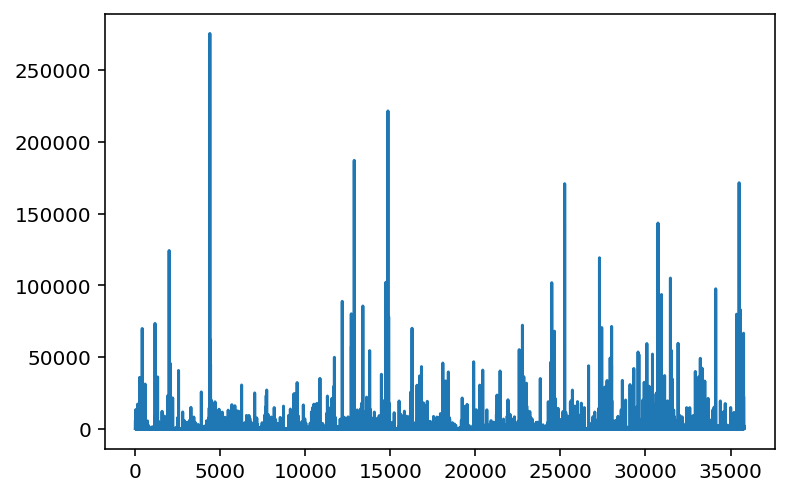

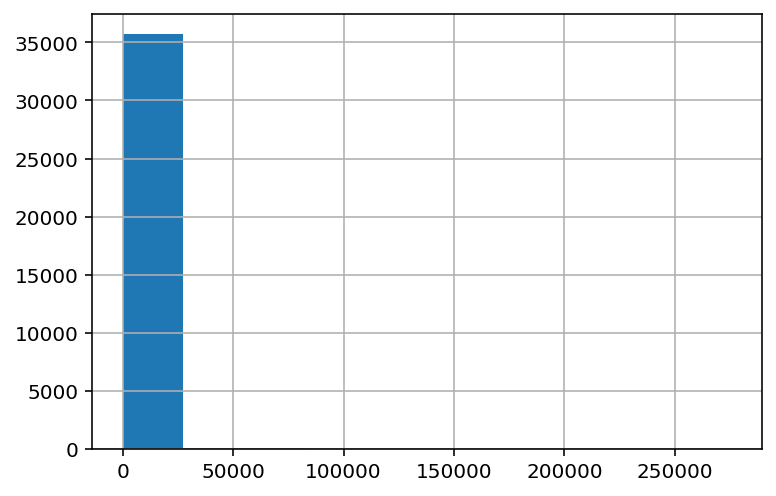

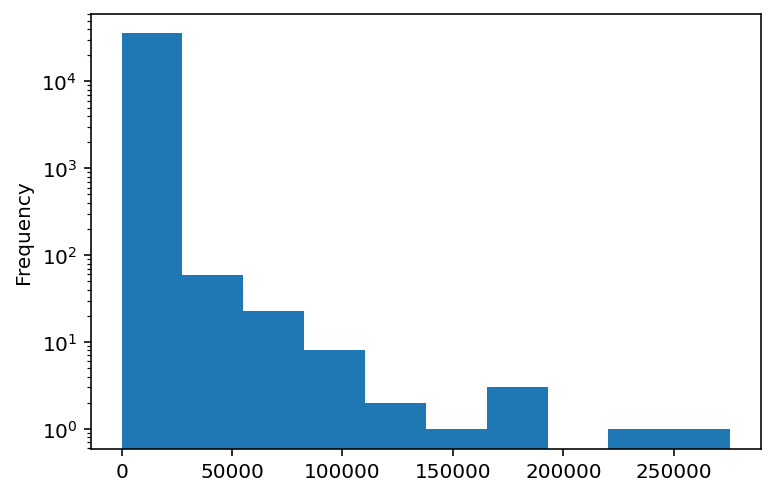

In [26]:
plt.figure()
fig = df['Déchets'].plot()
fig
#plt.savefig('plot_base.png', bbox_inches='tight')

plt.figure()
fig = df['Déchets'].hist()
fig
#plt.savefig('plot_hist.png', bbox_inches='tight')

plt.figure()
fig = df['Déchets'].plot(kind = 'hist', logy = True)
fig
#plt.show()
#plt.savefig('plot_hist_log.png', bbox_inches='tight')

La sortie est un objet `matplotlib`. La *customisation* de ces
figures est ainsi
possible (et même désirable car les graphiques `matplotlib`
sont, par défaut, assez rudimentaires), nous en verrons quelques exemples.


# Accéder à des éléments d'un DataFrame

## Sélectionner des colonnes

En SQL, effectuer des opérations sur les colonnes se fait avec la commande
`SELECT`. Avec `pandas`,
pour accéder à une colonne dans son ensemble on peut
utiliser plusieurs approches:

* `dataframe.variable`, par exemple `df.Energie`.
Cette méthode requiert néanmoins d'avoir des
noms de colonnes sans espace.
* `dataframe[['variable']]` pour renvoyer la variable sous
forme de `DataFrame` ou dataframe['variable'] pour
la renvoyer sous forme de `Series`. Par exemple, `df[['Autres transports']]`
ou `df['Autres transports']`. C'est une manière préférable de procéder.

## Accéder à des lignes

Pour accéder à une ou plusieurs valeurs d'un `DataFrame`,
il existe deux manières conseillées de procéder, selon la
forme des indices de lignes ou colonnes utilisés:

* `df.loc`: use labels
* `df.iloc`: use indices

Les bouts de code utilisant la structure `df.ix`
sont à bannir car la fonction est *deprecated* et peut
ainsi disparaître à tout moment.

`iloc` va se référer à l'indexation de 0 à *N* où *N* est égal à `df.shape[0]` d'un
`pandas.DataFrame`. `loc` va se référer aux valeurs de l'index
de `df`.

Par exemple, si j'ai un `pandas.DataFrame` `df`:
```
       year  sale
month
1      2012    55
4      2014    40
7      2013    84
10     2014    31
```
Alors `df.loc[1, :]` donnera la première ligne de `df` (ligne où l'indice `month` est égal à 1) tandis que
`df.iloc[1, :]` donnera la deuxième ligne (puisque l'indexation en `Python` commence à 0).


<!----
data.loc[1:3]
data.loc[(data.age >= 20), ['section', 'city']]

data.iloc[[0,2]]
data.iloc[[0,2],[1,3]]
data.iloc[1:3,2:4]

data.loc[(data.age >= 12), ['section']]
------>

# Principales manipulation de données

L'objectif du [TP pandas](#pandasTP) est de se familiariser plus avec ces
commandes à travers l'exemple des données des émissions de C02.

Les opérations les plus fréquentes en SQL sont résumées par le tableau suivant.
Il est utile de les connaître (beaucoup de syntaxes de maniement de données
reprennent ces termes) car, d'une
manière ou d'une autre, elles couvrent la plupart
des usages de manipulation des données

| Opération | SQL | pandas | dplyr (`R`) | data.table (`R`) |
|-----|-----------|--------|-------------|------------------|
| Sélectionner des variables par leur nom | `SELECT` | `df[['Autres transports','Energie']]` | `df %>% select(Autres transports, Energie)` | `df[, c('Autres transports','Energie')]` |
| Sélectionner des observations selon une ou plusieurs conditions; | `FILTER` | `df[df['Agriculture']>2000]` | `df %>% filter(Agriculture>2000)` | `df[Agriculture>2000]` |
| Trier la table selon une ou plusieurs variables | `SORT BY` | `df.sort_values(['Commune','Agriculture'])` | `df %>% arrange(Commune, Agriculture)` | `df[order(Commune, Agriculture)]` |
| Ajouter des variables qui sont fonction d’autres variables; | `SELECT *, LOG(Agriculture) AS x FROM df` | `df['x'] = np.log(df['Agriculture'])`  |  `df %>% mutate(x = log(Agriculture))` | `df[,x := log(Agriculture)]` |
| Effectuer une opération par groupe | `GROUP BY` | `df.groupby('Commune').mean()` | `df %>% group_by(Commune) %>% summarise(m = mean)` | `df[,mean(Commune), by = Commune]` |
| Joindre deux bases de données (*inner join*) | `SELECT * FROM table1 INNER JOIN table2 ON table1.id = table2.x` | `table1.merge(table2, left_on = 'id', right_on = 'x')` | `table1 %>% inner_join(table2, by = c('id'='x'))` | `merge(table1, table2, by.x = 'id', by.y = 'x')` |

## Opérations sur les colonnes: select, mutate, drop

Les DataFrames pandas sont des objets *mutables* en langage `python`,
c'est-à-dire qu'il est possible de faire évoluer le DataFrame au grès
des opérations. L'opération la plus classique consiste à ajouter ou retirer
des variables à la table de données.


{{% box status="danger" title="warning" icon="fa fa-exclamation-triangle" %}}
Attention au comportement de `pandas` lorsqu'on crée une duplication
d'un DataFrame. Par défaut, `pandas` effectue une copie par référence. Dans ce
cas, les deux objets (la copie et l'objet copié) restent reliés. Les colonnes
crées sur l'un vont être répercutées sur l'autre. Ce comportement permet de
limiter l'inflation en mémoire de `python`. En faisant ça, le deuxième
objet prend le même espace mémoire que le premier. Le package `data.table`
en  `R` adopte le même comportement, contrairement à `dplyr`.

Cela peut amener à quelques surprises si ce comportement d'optimisation
n'est pas anticipé. Si vous voulez, par sécurité, conserver intact le
premier DataFrame, faites appel à une copie profonde (*deep copy*) en
utilisant la méthode `copy`:


In [27]:
df_new = df.copy()

Attention toutefois, cela a un coût mémoire. Avec des données volumineuses, c'est une pratique à utiliser avec précaution

{{% /box %}}

La manière la plus simple d'opérer pour ajouter des colonnes est
d'utiliser la réassignation. Par exemple, pour créer une variable
`x` qui est le `log` de la
variable `Agriculture`:


In [28]:
df_new['x'] = np.log(df_new['Agriculture'])

Il est possible d'appliquer cette approche sur plusieurs colonnes. Un des
intérêts de cette approche est qu'elle permet de recycler le nom de colonnes.


In [29]:
vars = ['Agriculture', 'Déchets', 'Energie']

df_new[[v + "_log" for v in vars]] = np.log(df_new[vars])
df_new

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,x,Agriculture_log,Déchets_log,Energie_log
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172,8.219171,8.219171,4.619374,0.856353
1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207,6.164010,6.164010,4.946455,0.856353
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577909,NaN,10313.446520,5314.314445,998.332482,2930.354461,16616.822530,15642.420310,10732.376930,6.212693,6.212693,8.578159,6.906086
3,01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,663.683146,1756.341319,782.404357,7.527881,7.527881,5.376285,4.545232
4,01006,AMBLEON,448.966808,NaN,NaN,77.033834,48.401549,NaN,NaN,43.714019,398.786800,51.681756,6.106949,6.106949,3.879532,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35793,95676,VILLERS-EN-ARTHIES,1628.065094,NaN,NaN,165.045396,65.063617,11.772789,34.556067,176.098160,309.627908,235.439109,7.395148,7.395148,4.175366,2.465791
35794,95678,VILLIERS-ADAM,698.630772,NaN,NaN,1331.126598,111.480954,2.354558,6.911213,1395.529811,18759.370070,403.404815,6.549122,6.549122,4.713854,0.856353
35795,95680,VILLIERS-LE-BEL,107.564967,NaN,NaN,8367.174532,225.622903,534.484607,1568.845431,22613.830250,12217.122400,13849.512000,4.678095,4.678095,5.418865,6.281303
35796,95682,VILLIERS-LE-SEC,1090.890170,NaN,NaN,326.748418,108.969749,2.354558,6.911213,67.235487,4663.232127,85.657725,6.994749,6.994749,4.691070,0.856353


Il est également possible d'utiliser la méthode `assign`. Pour des opérations
vectorisées, comme le sont les opérateurs de `numpy`, cela n'a pas d'intérêt.

Cela permet notamment d'enchainer les opérations sur un même `DataFrame` (notamment grâce au `pipe` que
nous verrons plus loin).
Cette approche utilise généralement
des *lambda functions*. Par exemple le code précédent (celui concernant une
 seule variable) prendrait la forme:


In [30]:
df_new.assign(Energie_log = lambda x: np.log(x['Energie']))

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,x,Agriculture_log,Déchets_log,Energie_log
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172,8.219171,8.219171,4.619374,0.856353
1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207,6.164010,6.164010,4.946455,0.856353
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577909,NaN,10313.446520,5314.314445,998.332482,2930.354461,16616.822530,15642.420310,10732.376930,6.212693,6.212693,8.578159,6.906086
3,01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,663.683146,1756.341319,782.404357,7.527881,7.527881,5.376285,4.545232
4,01006,AMBLEON,448.966808,NaN,NaN,77.033834,48.401549,NaN,NaN,43.714019,398.786800,51.681756,6.106949,6.106949,3.879532,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35793,95676,VILLERS-EN-ARTHIES,1628.065094,NaN,NaN,165.045396,65.063617,11.772789,34.556067,176.098160,309.627908,235.439109,7.395148,7.395148,4.175366,2.465791
35794,95678,VILLIERS-ADAM,698.630772,NaN,NaN,1331.126598,111.480954,2.354558,6.911213,1395.529811,18759.370070,403.404815,6.549122,6.549122,4.713854,0.856353
35795,95680,VILLIERS-LE-BEL,107.564967,NaN,NaN,8367.174532,225.622903,534.484607,1568.845431,22613.830250,12217.122400,13849.512000,4.678095,4.678095,5.418865,6.281303
35796,95682,VILLIERS-LE-SEC,1090.890170,NaN,NaN,326.748418,108.969749,2.354558,6.911213,67.235487,4663.232127,85.657725,6.994749,6.994749,4.691070,0.856353


Dans les méthodes suivantes, il est possible de modifier le `pandas.DataFrame`
*en place*, c'est à dire en ne le réassignant pas, avec le paramètre `inplace = True`.
Par défaut, `inplace` est égal à False et pour modifier le `pandas.DataFrame`,
il convient de le réassigner.

On peut facilement renommer des variables avec la méthode `rename` qui
fonctionne bien avec des dictionnaires (pour renommer des colonnes il faut
préciser le paramètre `axis = 1`):


In [31]:
df_new = df_new.rename({"Energie": "eneg", "Agriculture": "agr"}, axis=1)

Enfin, pour effacer des colonnes, on utilise la méthode `drop` avec l'argument
`columns`:


In [32]:
df_new = df_new.drop(columns = ["eneg", "agr"])

## Réordonner

La méthode `sort_values` permet de réordonner un `DataFrame`. Par exemple,
si on désire classer par ordre décroissant de consommation de CO2 du secteur
résidentiel, on fera


In [33]:
df = df.sort_values("Résidentiel", ascending = False)

Ainsi, en une ligne de code, on identifie les villes où le secteur
résidentiel consomme le plus.


## Filtrer

L'opération de sélection de lignes s'appelle `FILTER` en SQL. Elle s'utilise
en fonction d'une condition logique (clause `WHERE`). On sélectionne les
données sur une condition logique. Il existe plusieurs méthodes en `pandas`.

La plus simple est d'utiliser les *boolean mask*, déjà vus dans le chapitre
[`numpy`](#numpy)

Par exemple, pour sélectionner les communes dans les Hauts-de-Seine, on
peut utiliser le résultat de la méthode `str.startswith` (qui renvoie
`True` ou `False`) directement dans les crochets:


In [34]:
df[df['INSEE commune'].str.startswith("92")].head(2)

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
35494,92012,BOULOGNE-BILLANCOURT,NaN,1250.483441,34.234669,51730.70425,964.828694,8817.818741,25882.49400,92216.97146,64985.28090,60349.10948
35501,92025,COLOMBES,NaN,411.371588,14.220061,53923.84709,698.685861,12855.885270,50244.66423,87469.54946,52070.92794,41526.60087


Pour remplacer des valeurs spécifiques, on utilise la méthode `where` ou une
réassignation couplée à la méthode précédente.

Par exemple, pour assigner des valeurs manquantes aux départements du 92,
on peut faire cela


In [35]:
df_copy = df.copy()
df_copy = df_copy.where(~df['INSEE commune'].str.startswith("92"))

et vérifier les résultats:


In [36]:
df_copy[df['INSEE commune'].str.startswith("92")].head(2)
df_copy[~df['INSEE commune'].str.startswith("92")].head(2)

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
12167,31555,TOULOUSE,1434.045233,4482.980062,130.792683,576394.1812,88863.73254,91549.91409,277062.57320,410675.9020,586054.6728,288175.4001
16774,44109,NANTES,248.019465,138738.544300,250814.701200,193478.2482,18162.26163,17461.40021,77897.13855,354259.0138,221068.6327,173447.5828


ou alors utiliser une réassignation plus classique:


In [37]:
df_copy = df.copy()
df_copy[df_copy['INSEE commune'].str.startswith("92")] = np.nan

Il est conseillé de filtrer avec `loc` en utilisant un masque.
En effet, contrairement à `df[mask]`, `df.loc[mask, :]` permet d'indiquer clairement
à Python que l'on souhaite appliquer le masque aux labels de l'index.
Ce n'est pas le cas avec `df[mask]`. D'ailleurs, lorsqu'on utilise la syntaxe `df[mask]`, `pandas` renvoie généralement un *warning*

## Opérations par groupe

En SQL, il est très simple de découper des données pour
effectuer des opérations sur des blocs cohérents et recollecter des résultats
dans la dimension appropriée.
La logique sous-jacente est celle du *split-apply-combine* qui est repris
par les langages de manipulation de données, auxquels `pandas`
[ne fait pas exception](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

L'image suivante, issue de
[ce site](https://unlhcc.github.io/r-novice-gapminder/16-plyr/)
représente bien la manière dont fonctionne l'approche
`split`-`apply`-`combine`

![Split-apply-combine](https://unlhcc.github.io/r-novice-gapminder/fig/12-plyr-fig1.png)


Ce [tutoriel](https://realpython.com/pandas-groupby/) sur le sujet
est particulièrement utile.

Pour donner quelques exemples, on peut créer une variable départementale qui
servira de critère de groupe.


In [38]:
df['dep'] = df['INSEE commune'].str[:2]

En `pandas`, on utilise `groupby` pour découper les données selon un ou
plusieurs axes. Techniquement, cette opération consiste à créer une association
entre des labels (valeurs des variables de groupe) et des
observations.

Par exemple, pour compter le nombre de communes par département en SQL, on
utiliserait la requête suivante:

```sql
SELECT dep, count(INSEE commune)
FROM df
GROUP BY dep;
```

Ce qui, en `pandas`, donne:


In [39]:
df.groupby('dep')["INSEE commune"].count()

dep
01    410
02    805
03    318
04    199
05    168
     ... 
91    196
92     36
93     40
94     47
95    185
Name: INSEE commune, Length: 96, dtype: int64

La syntaxe est quasiment transparente. On peut bien-sûr effectuer des opérations
par groupe sur plusieurs colonnes. Par exemple,


In [40]:
df.groupby('dep').mean()

,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
dep,,,,,,,,,,
01,1974.535382,100.307344,8.900375,1736.353087,671.743966,280.485435,1744.567552,1346.982227,3988.658995,1021.089078
02,1585.417729,202.878748,17.390638,767.072924,223.907551,76.316247,932.135611,793.615867,1722.240298,403.744266
03,6132.029417,240.076499,45.429978,1779.630883,349.746819,326.904841,1452.423506,1401.650215,3662.773062,705.937016
04,1825.455590,177.321816,NaN,583.198128,253.975910,62.808435,313.913553,587.116013,1962.654370,493.609329
05,1847.508592,141.272767,NaN,502.012857,132.548068,34.971220,102.649239,728.734494,2071.010178,463.604908
...,...,...,...,...,...,...,...,...,...,...
91,802.793163,10114.998156,73976.107890,3716.906101,1496.516194,538.761253,1880.810170,6532.123033,10578.452789,3866.757199
92,8.309835,362.964554,13.132461,29663.579636,7347.163354,6745.611612,19627.706224,40744.279029,33289.456629,23222.587594
93,50.461775,1753.443710,61188.896638,18148.789684,6304.173594,2570.941598,10830.409025,32911.305703,35818.236459,21575.444795


A noter que la variable de groupe, ici `dep`, devient, par défaut, l'index
du DataFrame de sortie. Si on avait utilisé plusieurs variables de groupe,
on obtiendrait un objet multi-indexé. Sur la gestion des `multiindex`, on
pourra se référer à la référence de `Modern pandas` donnée en fin de cours.

Tant qu'on n'appelle pas une action sur un DataFrame par groupe, du type
`head` ou `display`, `pandas` n'effectue aucune opération. On parle de
*lazy evaluation*. Par exemple, le résultat de `df.groupby('dep')` est
une transformation qui n'est pas encore évaluée:


In [41]:
df.groupby('dep')

Il est possible d'appliquer plus d'une opération à la fois grâce à la méthode
`agg`. Par exemple, pour obtenir à la fois le minimum, la médiane et le maximum
de chaque département, on peut faire:


In [42]:
df.groupby('dep').agg(['min',"median","max"])

/tmp/ipykernel_784/2776048488.py:1: FutureWarning:

['INSEE commune', 'Commune'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Agriculture                            Autres transports              \
            min       median           max               min      median   
dep                                                                        
01     0.003432  1304.519570  14402.057330          3.307596   75.686090   
02     0.391926  1205.725078  13257.716590          0.326963  130.054615   
03     5.041238  5382.194339  24912.249270         24.158870  144.403590   
04    30.985972  1404.752852  11423.535550         33.513854  158.780500   
05    38.651727  1520.896526  13143.465810          0.299734  139.754980   
..          ...          ...           ...               ...         ...   
91     0.400740   516.908303   5965.349174         25.785594  177.177127   
92     0.073468     6.505185     32.986132          7.468879  297.529178   
93     3.308495     3.308495   1362.351634         24.188172  320.755486   
94     1.781885     1.781885    556.939161          6.249609  294.204166   
95     8.779506   445.279844   2987.287417          1.749091   80.838639   

                   Autres transports international                           \
               max                             min     median           max   
dep                                                                           
01      617.281080                        0.297256   6.985161  2.209492e+01   
02     1126.961565                        0.517437  15.492120  5.799402e+01   
03     1433.217868                       29.958027  42.762328  8.269019e+01   
04      362.637639                             NaN        NaN           NaN   
05      456.042002                             NaN        NaN           NaN   
..             ...                             ...        ...           ...   
91   513140.971700                        1.651873  14.762210  7.858782e+05   
92     1250.483441                        1.104401  11.482381  3.423467e+01   
93    45251.869710                        0.171075  12.449476  1.101146e+06   
94   103252.271300                        0.390223  14.944807  1.571965e+05   
95    44883.982750                        0.201508  13.149987  1.101131e+06   

    CO2 biomasse hors-total  ... Industrie hors-énergie  Résidentiel  \
                        min  ...                    max          min   
dep                          ...                                       
01                30.571400  ...          175185.892500     9.607822   
02                28.294993  ...          220963.067200     7.849347   
03                44.825515  ...          154061.446400    19.441088   
04                 7.162928  ...           16889.531060     1.708652   
05                20.931602  ...            4271.129851     6.871678   
..                      ...  ...                    ...          ...   
91                41.661474  ...           50288.560830    15.886514   
92              2173.614704  ...           95840.512400  4122.277198   
93               899.762120  ...           89135.302370  4364.038661   
94               928.232154  ...           96716.055180  2668.358896   
95                13.490977  ...           66216.914750    11.585833   

                                     Routier                              \
           median           max          min        median           max   
dep                                                                        
01     351.182294   57689.83290    20.848982   1598.934148   45258.25641   
02     138.819865   99038.12424    22.936184    700.826152   49245.10173   
03     217.959697   75793.88248   120.667614   1426.905646   40957.84530   
04     133.130946   18088.18953    30.206298    687.390045   31438.07833   
05     211.945147   46486.55575    57.132270    958.506314   37846.65118   
..            ...           ...          ...           ...           ...   
91    2580.902085   48464.97971    20.260110   3610.009633   72288.02012   
92   33667.904690   92216.97146  4968.382962  23516.458235  113

## Appliquer des fonctions

`pandas` est, comme on a pu le voir, un package très flexible, qui
propose une grande variété de méthodes optimisées. Cependant, il est fréquent
d'avoir besoin de méthodes non implémentées.

Dans ce cas, on recourt souvent aux `lambda` functions. Par exemple, si
on désire connaître les communes dont le nom fait plus de 10 caractères,
on peut appliquer la fonction `len` de manière itérative:


In [43]:
# Noms de communes superieurs à 10 caracteres
df[df['Commune'].apply(lambda s: len(s)>40)]

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,dep
28082,70058,BEAUJEU-SAINT-VALLIER-PIERREJUX-ET-QUITTEUR,4024.909815,736.948351,41.943384,1253.135313,125.101996,2.354558,6.911213,549.734302,1288.215480,452.693897,70
4984,14621,SAINT-MARTIN-DE-BIENFAITE-LA-CRESSONNIERE,1213.333523,NaN,NaN,677.571743,72.072503,63.573059,186.602760,298.261044,1396.353375,260.801452,14
19276,51513,SAINT-REMY-EN-BOUZEMONT-SAINT-GENEST-ET-ISSON,1927.401921,NaN,NaN,595.583152,71.675773,4.709115,13.822427,273.826687,521.864748,259.365848,51
5402,16053,BORS (CANTON DE BAIGNES-SAINTE-RADEGONDE),1919.249545,NaN,NaN,165.443226,16.265904,2.354558,6.911213,54.561623,719.293151,58.859777,16


Cependant, toutes les `lambda` functions ne se justifient pas.
Par exemple, prenons
le résultat d'agrégation précédent. Imaginons qu'on désire avoir les résultats
en milliers de tonnes. Dans ce cas, le premier réflexe est d'utiliser
la `lambda` function suivante:


In [44]:
df.groupby('dep').agg(['min',"median","max"]).apply(lambda s: s/1000)

/tmp/ipykernel_784/3726729127.py:1: FutureWarning:

['INSEE commune', 'Commune'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Agriculture                      Autres transports                        \
            min    median        max               min    median         max   
dep                                                                            
01     0.000003  1.304520  14.402057          0.003308  0.075686    0.617281   
02     0.000392  1.205725  13.257717          0.000327  0.130055    1.126962   
03     0.005041  5.382194  24.912249          0.024159  0.144404    1.433218   
04     0.030986  1.404753  11.423536          0.033514  0.158781    0.362638   
05     0.038652  1.520897  13.143466          0.000300  0.139755    0.456042   
..          ...       ...        ...               ...       ...         ...   
91     0.000401  0.516908   5.965349          0.025786  0.177177  513.140972   
92     0.000073  0.006505   0.032986          0.007469  0.297529    1.250483   
93     0.003308  0.003308   1.362352          0.024188  0.320755   45.251870   
94     0.001782  0.001782   0.556939          0.006250  0.294204  103.252271   
95     0.008780  0.445280   2.987287          0.001749  0.080839   44.883983   

    Autres transports international                         \
                                min    median          max   
dep                                                          
01                         0.000297  0.006985     0.022095   
02                         0.000517  0.015492     0.057994   
03                         0.029958  0.042762     0.082690   
04                              NaN       NaN          NaN   
05                              NaN       NaN          NaN   
..                              ...       ...          ...   
91                         0.001652  0.014762   785.878155   
92                         0.001104  0.011482     0.034235   
93                         0.000171  0.012449  1101.145545   
94                         0.000390  0.014945   157.196520   
95                         0.000202  0.013150  1101.131222   

    CO2 biomasse hors-total  ... Industrie hors-énergie Résidentiel  \
                        min  ...                    max         min   
dep                          ...                                      
01                 0.030571  ...             175.185892    0.009608   
02                 0.028295  ...             220.963067    0.007849   
03                 0.044826  ...             154.061446    0.019441   
04                 0.007163  ...              16.889531    0.001709   
05                 0.020932  ...               4.271130    0.006872   
..                      ...  ...                    ...         ...   
91                 0.041661  ...              50.288561    0.015887   
92                 2.173615  ...              95.840512    4.122277   
93                 0.899762  ...              89.135302    4.364039   
94                 0.928232  ...              96.716055    2.668359   
95                 0.013491  ...              66.216915    0.011586   

                             Routier                        Tertiaire  \
        median         max       min     median         max       min   
dep                                                                     
01    0.351182   57.689833  0.020849   1.598934   45.258256  0.010049   
02    0.138820   99.038124  0.022936   0.700826   49.245102  0.006221   
03    0.217960   75.793882  0.120668   1.426906   40.957845  0.017706   
04    0.133131   18.088190  0.030206   0.687390   31.438078  0.000957   
05    0.211945   46.486556  0.057132   0.958506   37.846651  0.004785   
..         ...         ...       ...        ...         ...       ...   
91    2.580902   48.464980  0.020260   3.610010   72.288020  0.036369   
92   33.667905   92.216971  4.968383  23.516458  113.716853  0.800589   
93   31.428227   87.927731  1.632496  22.506759  193.039793  2.257371   
94   24.372900  100.948170  1.266102  19.088651   97.625958  1.190116   
95    1.434344  104.543466  0.002619   3.417198  147.040905  0.011485 

En effet, cela effectue le résultat désiré. Cependant, il y a mieux: utiliser
la méthode `div`:


In [45]:
#| eval: false
import timeit
%timeit df.groupby('dep').agg(['min',"median","max"]).div(1000)
%timeit df.groupby('dep').agg(['min',"median","max"]).apply(lambda s: s/1000)

La méthode `div` est en moyenne plus rapide et a un temps d'exécution
moins variable. Dans ce cas, on pourrait même utiliser le principe
du *broadcasting* de numpy (cf. [chapitre numpy](numpy)) qui offre
des performances équivalentes:


In [46]:
#| eval: false
%timeit df.groupby('dep').agg(['min',"median","max"])/1000

`apply` est plus rapide qu'une boucle (en interne, `apply` utilise `Cython`
pour itérer) mais reste moins rapide qu'une solution vectorisée quand
elle existe. Ce [site](https://realpython.com/fast-flexible-pandas/#pandas-apply)
propose des solutions, par exemple les méthodes `isin` ou `digitize`, pour
éviter de manuellement créer des boucles lentes.

En particulier, il faut noter que `apply` avec le paramètre `axis=1` est en générale lente.

## Joindre


Il est commun de devoir combiner des données issues de sources différentes.
Nous allons ici nous focaliser sur le cas le plus favorable qui est la situation
où une information permet d'apparier de manière exacte deux bases de données (autrement nous
serions dans une situation, beaucoup plus complexe, d'appariement flou).

La situation typique est l'appariement entre deux sources de données selon un identifiant
individuel. Ici, il s'agit d'un identifiant de code commune.

Il est recommandé de lire [ce guide assez complet sur la question des jointures avec R](https://www.book.utilitr.org/jointures.html) qui donne des recommandations également utiles en `python`.

On utilise de manière indifférente les termes *merge* ou *join*.
Le deuxième terme provient de la syntaxe SQL.
En `pandas`, dans la plupart des cas, on peut utiliser indifféremment `df.join` et `df.merge`

![](pandas_join.png)

Il est aussi possible de réaliser un merge en utilisant la fonction `pandas.concat()` avec `axis=1`.
Se référer à la documentation de `concat` pour voir les options possibles.


## Reshape

On présente généralement deux types de données:

* format __wide__: les données comportent des observations répétées, pour un même individu (ou groupe), dans des colonnes différentes
* format __long__: les données comportent des observations répétées, pour un même individu, dans des lignes différentes avec une colonne permettant de distinguer les niveaux d'observations

Un exemple de la distinction entre les deux peut être pris à l'ouvrage de référence d'Hadley Wickham, *R for Data Science*:

![](https://d33wubrfki0l68.cloudfront.net/3aea19108d39606bbe49981acda07696c0c7fcd8/2de65/images/tidy-9.png)


L'aide mémoire suivante aidera à se rappeler les fonctions à appliquer si besoin:

![](reshape.png)

Le fait de passer d'un format *wide* au format *long* (ou vice-versa) peut être extrêmement pratique car
certaines fonctions sont plus adéquates sur une forme de données ou sur l'autre.
En règle générale, avec `python` comme avec `R`, les formats *long* sont souvent préférables.

Le TP pandas proposera des applications de ces principes


<a href="https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)]("https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/course/manipulation/02b_pandas_TP.ipynb")
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)]("https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2
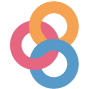

In [47]:
#| echo: false
#| output: 'asis'
#| include: true
#| eval: true

import sys
sys.path.insert(1, '../../../../') #insert the utils module
from utils import print_badges

#print_badges(__file__)
print_badges("content/course/manipulation/02b_pandas_TP.qmd")

## Les pipe

En général, dans un projet, le nettoyage de données va consister en un ensemble de
méthodes appliquées à un `pandas.DataFrame`.
On a vu que `assign` permettait de créer une variable dans un DataFrame.
Il est également possible d'appliquer une fonction, appelée par exemple `my_udf` au
DataFrame grâce à `pipe`:

~~~python
df = (pd.read_csv(path2data)
            .pipe(my_udf))
~~~

# Quelques enjeux de performance

La librairie `dask` intègre la structure de `numpy`, `pandas` et `sklearn`.
Elle a vocation à traiter de données en grande dimension, ainsi elle ne sera pas
optimale pour des données qui tiennent très bien en RAM.
Il s'agit d'une librairie construite sur la parallélisation.
Pour aller plus loin, se référer à la [documentation de `dask`](https://docs.dask.org/en/latest/).


# Références

* Le site
[pandas.pydata](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html)
fait office de référence

# Annexe {#annexe}

## Téléchargement de `pynsee` avec barre de progrès

Ce code vient du [package `pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/blob/master/pynsee/download/__init__.py)...


In [48]:
import warnings
import os
import requests
import zipfile
from pathlib import Path
from shutil import copyfile, copyfileobj

# import tqdm.auto as tqdma
from tqdm import tqdm
from tqdm.utils import CallbackIOWrapper


def download_pb(url: str, fname: str, total: int = None):
    """Useful function to get request with a progress bar
    Borrowed from https://gist.github.com/yanqd0/c13ed29e29432e3cf3e7c38467f42f51
    Arguments:
        url {str} -- URL for the source file
        fname {str} -- Destination where data will be written
    """
    resp = requests.get(url, stream=True)

    if total is None:
        total = int(resp.headers.get('content-length', 0))

    with open(fname, 'wb') as file, tqdm(
            desc='Downloading: ',
            total=total,
            unit='iB',
            unit_scale=True,
            unit_divisor=1024,
    ) as bar:
        for data in resp.iter_content(chunk_size=1024):
            size = file.write(data)
            bar.update(size)


def unzip_pb(fzip, dest, desc="Extracting"):
    """
    Useful function to unzip with progress bar
    Args:
        fzip: Filename of the zipped file
        dest: Destination where data must be written
        desc: Argument inherited from zipfile.ZipFile
    Returns:
        zipfile.Zipfile(fzip).extractall(dest) with progress
    """

    dest = Path(dest).expanduser()
    Path(dest).mkdir(parents=True, exist_ok=True)

    with zipfile.ZipFile(fzip) as zipf, tqdm(
            desc=desc, unit="B", unit_scale=True, unit_divisor=1024,
            total=sum(getattr(i, "file_size", 0) for i in zipf.infolist()),
    ) as pbar:
        for i in zipf.infolist():
            if not getattr(i, "file_size", 0):  # directory
                zipf.extract(i, os.fspath(dest))
            else:
                with zipf.open(i) as fi, open(os.fspath(dest / i.filename), "wb") as fo:
                    copyfileobj(CallbackIOWrapper(pbar.update, fi), fo)


download_pb('https://github.com/InseeFrLab/Py-Insee-Data/archive/refs/heads/master.zip', 'pynsee.zip')

unzip_pb("pynsee.zip", "pynsee")

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 840kiB [00:00, 8.29MiB/s]

Downloading: : 2.74MiB [00:00, 14.5MiB/s]

Downloading: : 4.12MiB [00:00, 6.37MiB/s]

Downloading: : 8.03MiB [00:00, 13.3MiB/s]

Downloading: : 12.2MiB [00:00, 19.1MiB/s]

Downloading: : 12.3MiB [00:00, 15.2MiB/s]

Extracting:   0%|          | 0.00/13.2M [00:00<?, ?B/s]

Extracting: 100%|█████████▉| 13.2M/13.2M [00:00<00:00, 138MB/s]

Extracting: 100%|██████████| 13.2M/13.2M [00:00<00:00, 131MB/s]